# SWMAL Exercise


## Gradient Descent Methods and Training


$$

    \providecommand\rem[1]{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \providecommand\eq[2]{#1 &=& #2\\}
    \providecommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \providecommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \providecommand\st[1]{_{\textrm{\scriptsize #1}}}
    \providecommand\norm[1]{{\cal L}_{#1}}
    \providecommand\obs[2]{#1_{\textrm{\scriptsize obs}}^{\left(#2\right)}}
    \providecommand\diff[1]{\mathrm{d}#1}
    \providecommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\textrm{\scriptsize test}}}
    \def\powtrain{\pown{\textrm{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
    \providecommand\pfrac[2]{\frac{\partial~#1}{\partial~#2}}
    \providecommand\dfrac[2]{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
    
$$

### Qa The Gradient Descent Method (GD)

Gradient descent is a generic optimization algorithm capable of finding optimal solations to a wide range if problems. Which means it is an iterative optimization algorithm used to find the minimum of a function. The function used in this case is the cost function `J(w)`. The idea is based on taking steps proportional to the negative of the gradient of the function at the current point 

The code below firstly import all the libraries. Secondly theres is created a new function `GenerateData()` and the function returns 3 values `X, X_b, y`. `GenerateData()` generates random data for a linear regression where `X` represents a matrix of input features and `y` represents the target values. And atlast we have the `X_b` and it is the augmented feature matrix with the bias term. 

The `eta` is the learning rate, which is the steps the algorithm  takes towards finding the minimum of the cost function. If `eta` is too large, the algorithm may overshoot the minimum, which can potentially causing it to keep bouncing around near the minimum without settling down or it never reach a stable minimum and keeps running indefinitely. Conversely, if `eta` is too small, the algorithm may take a very long time to it never reach a stable minimum and keeps running indefinitely or get stuck in a local minimum.

The `n_iterations` is the number of epochs also called iterations. 
The `m` is the number of samples
The `theta` is the intial random initializtaion

Inside the forloop we calculate the compute gradients of MSE with respect to theta and then we update the using the gradients and learning rate. This is repeated fir the number of iterations. 

See the pictures below on the left the learning rate is too low, and will eventually reach the solution, however it takes a long time. The middle the learning rate is looks pretty good, because we can see in a few epoch it already has convered to the solution. On the rigth the learning rate is too high, which mean the algorithm diverges. The algorithm is getting further and futher away from the solution. 

stochastic gradient descent theta=[4.20831857 2.79226572]


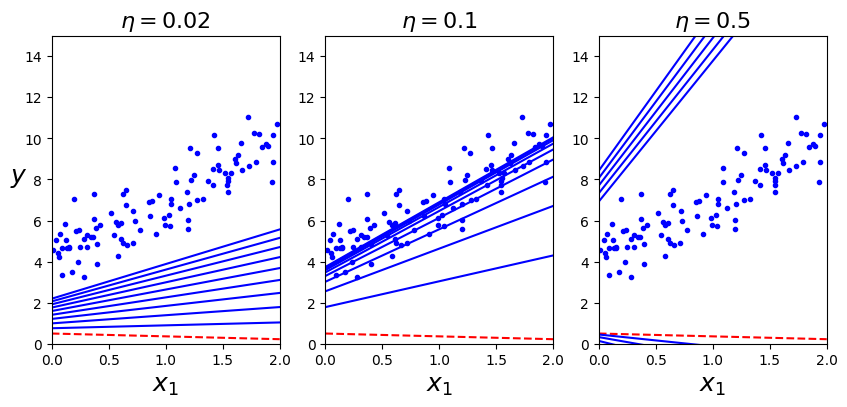

OK


In [3]:

# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def GenerateData():
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    #X_b represents a matrix of input features
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    return X, X_b, y

X, X_b, y = GenerateData()

eta = 0.1 # learning rate
n_iterations = 1000 #num of epochs/iterations
m = 100 # num of samples
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    # Compute gradients of MSE with respect to theta
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    # Update theta using the gradients and learning rate

    theta = theta - eta * gradients

print(f'stochastic gradient descent theta={theta.ravel()}')

##########################################################
# rest of the code is just for plotting, needs no review

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta_path_bgd = []
theta = np.random.randn(2,1)  # random initialization

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

print('OK')

`eta` is the learning rate. It defines the step size in a parameter update. A smaller learning rate will result in slower convergence, but more stable updates, where as higher learning rates is faster, but can lead to diverges. 

In the three plots, we see on the left that the learning rate is too low. The algorithm will eventually reach a solution, but this is a very slow pace, that will take too much time. 
To the right the learning rate is too high, we can see how the algorithm diverges and it gets further away from the solution.

In the middle, we see a stable learning rate, that reaches a solution in just a few epochs. 


### Qb The Stochastic Gradient Descent Method (SGD)

Stochastic Gradient Descent is a variant of the Gradient Descaent. The difference is how the update the model parameter. In the code the change in the paramterer is the theta.

The `np.random.randint(m)` generate a random integer between `[0;m)`. In the context `m` is the total number of data points in the traning set.

Now, introducing the _stochastic_ variant of gradient descent, explain the stochastic nature of the SGD, and comment on the difference to the _normal_ gradient descent method (GD) we just saw.

IMPLEMENTATION:::

HINT: In detail, the important differences are, that the main loop for SGC is 
```python
for epoch in range(n_epochs):
    for i in range(m):
        .
        .
        .
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = ...
        theta = ...
```
where it for the GD method was just
```python
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = ..
```

NOTE: the call `np.random.seed(42)` resets the random generator so that it produces the same random-sequence when re-running the code.

stochastic gradient descent theta=[4.24042206 2.81339809]
Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_=[4.16599768], sgd_reg.coef_=[2.76090213]


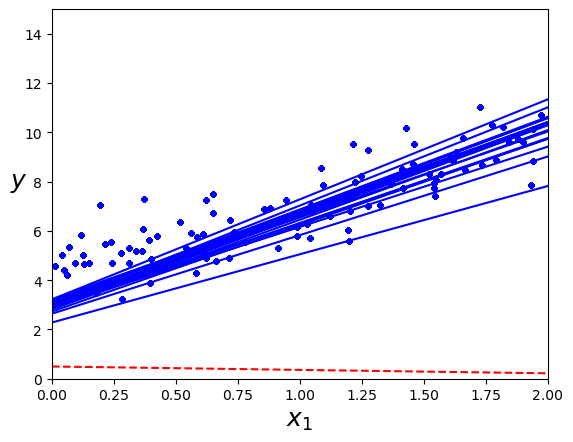

In [12]:
# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta) 
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)        
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

        plt.plot(X, y, "b.")      

from sklearn.linear_model import SGDRegressor
#sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
print(f'stochastic gradient descent theta={theta.ravel()}')
print(f'Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_={sgd_reg.intercept_}, sgd_reg.coef_={sgd_reg.coef_}')

##########################################################
# rest of the code is just for plotting, needs no review 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              

plt.show()        

print('OK')

### Qc Adaptive learning rate for $\eta$  

There is also an adaptive learning rate method in the demo code for the SGD. 

Explain the effects of the `learning_schedule()` functions.

You can set the learning rate parameter (also known as a hyperparameter) in may ML algorithms, say for SGD regression, to a method of your choice 

```python
SGDRegressor(max_iter=1,
             eta0=0.0005,
             learning_rate="constant", # or 'adaptive' etc.
             random_state=42)
```

but as usual, there is a bewildering array of possibilities...we will tackle this problem later when searching for the optimal hyperparameters.

NOTE: the `learning_schedule()` method could also have been used in the normal SG algorithm; is not directly part of the stochastic method, but a concept in itself.

In [ ]:
# TODO: Qc...in text

### Qd Mini-batch Gradient Descent Method 

Finally explain what a __mini-batch__ SG method is, and how it differs from the two others.

Again, take a peek into the demo code below, to extract the algorithm details...and explain the __main differences__, compared with the GD and SGD.

In [ ]:
# TODO: Qd...run this code

# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(f'mini-batch theta={theta.ravel()}')
print('OK')

mini-batch theta=[4.15518825 2.86894633]
OK


### Qe Choosing a Gradient Descent Method

Explain the $θ_0−θ_1$ plot below, and make a comment on when to use GD/SGD/mini-batch gradient descent (pros and cons for the different methods).

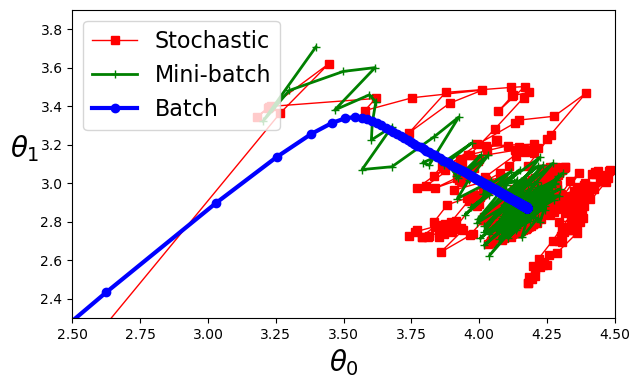

OK


In [ ]:
# TODO: Qd...run this code

# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
print('OK')

### [OPTIONAL]  Qf Extend the MyRegressor 

NOTE: this excercise only possible if `linear_regression_2.ipynb` has been solved.

Can you extend the `MyRegressor` class from the previous `linear_regression_2.ipynb` notebook, adding a numerical train method? Choose one of the gradient descent methods above...perhaps starting with a plain SG method.

You could add a parameter for the class, indicating it what mode it should be operating: analytical closed-form or numerical, like

```python  
class MyRegressor(BaseEstimator):
    def __init__(self, numerical = False):
        self.__w = None
        self.__numerical_mode = numerical
    .
    .
    .
```

In [ ]:
# TODO: Qf...[OPTIONAL]

REVISIONS||
:- | :- |
2018-02-14| CEF, initial.
2018-02-14| CEF, added optional exe.
2018-02-20| CEF, major update.
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, removed =0 in expression.
2018-02-25| CEF, minor text updates and made Qc optional.
2018-02-25| CEF, minor source code cleanups.
2021-09-18| CEF, update to ITMAL E21.
2021-10-02| CEF, corrected link to extra material and page numbers for HOML v2 (114/115=>121/122).
2022-01-25| CEF, update to SWMAL F22.
2023-02-22| CEF, updated page no to HOML 3rd. ed., updated to SWMAL F23
2023-09-19| CEF, changed LaTeX mbox and newcommand (VSCode error) to textrm/mathrm and providecommand.
